# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [2]:
BHE=pd.read_csv("C:/Users/gouth/OneDrive/Documents/capstone/BHE Meter Use Case Data/train_features.csv")

In [3]:
BHE.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [4]:
BHE.tail()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
1749489,1316,2016-12-31 23:00:00,38.844,0,14,Entertainment/public assembly,49975,255,0,-29.9,...,4.116,4.009,4.012,4.056,3.910,3.532,4.710,4.179,3.802,3.865
1749490,1318,2016-12-31 23:00:00,202.893,0,14,Entertainment/public assembly,73488,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.959,3.532,4.710,4.963,4.977,5.318
1749491,1319,2016-12-31 23:00:00,NaN,0,14,Entertainment/public assembly,287419,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.875,3.532,4.710,4.883,4.928,4.906
1749492,1323,2016-12-31 23:00:00,172.000,0,14,Office,87200,255,0,-29.9,...,4.116,4.009,4.012,4.056,5.210,4.211,4.710,5.283,5.160,5.157
1749493,1353,2016-12-31 23:00:00,2.400,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.009,4.012,4.056,1.967,1.556,4.188,1.750,1.896,1.566


In [5]:
BHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 57 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   building_id                    int64  
 1   timestamp                      object 
 2   meter_reading                  float64
 3   anomaly                        int64  
 4   site_id                        int64  
 5   primary_use                    object 
 6   square_feet                    int64  
 7   year_built                     int64  
 8   floor_count                    int64  
 9   air_temperature                float64
 10  cloud_coverage                 int64  
 11  dew_temperature                float64
 12  precip_depth_1_hr              int64  
 13  sea_level_pressure             float64
 14  wind_direction                 int64  
 15  wind_speed                     float64
 16  air_temperature_mean_lag7      float64
 17  air_temperature_max_lag7       float64
 18  ai

### Handling missing values

In [6]:
missing_values = BHE.isnull().sum()
print(missing_values)

building_id                           0
timestamp                             0
meter_reading                    107653
anomaly                               0
site_id                               0
primary_use                           0
square_feet                           0
year_built                            0
floor_count                           0
air_temperature                       0
cloud_coverage                        0
dew_temperature                       0
precip_depth_1_hr                     0
sea_level_pressure                    0
wind_direction                        0
wind_speed                            0
air_temperature_mean_lag7             0
air_temperature_max_lag7              0
air_temperature_min_lag7              0
air_temperature_std_lag7              0
air_temperature_mean_lag73            0
air_temperature_max_lag73             0
air_temperature_min_lag73             0
air_temperature_std_lag73             0
hour                                  0


In [7]:
# Fill missing values only in the 'meter_reading' column with the mean
BHE['meter_reading'].fillna(BHE['meter_reading'].mean(), inplace=True)

# Verify if missing values have been filled
missing_values_after = BHE['meter_reading'].isnull().sum()
print("Missing Values in 'meter_reading' After Filling:", missing_values_after)

Missing Values in 'meter_reading' After Filling: 0


In [8]:
# verifying dataset for missing values
BHE.isna().sum()

building_id                      0
timestamp                        0
meter_reading                    0
anomaly                          0
site_id                          0
primary_use                      0
square_feet                      0
year_built                       0
floor_count                      0
air_temperature                  0
cloud_coverage                   0
dew_temperature                  0
precip_depth_1_hr                0
sea_level_pressure               0
wind_direction                   0
wind_speed                       0
air_temperature_mean_lag7        0
air_temperature_max_lag7         0
air_temperature_min_lag7         0
air_temperature_std_lag7         0
air_temperature_mean_lag73       0
air_temperature_max_lag73        0
air_temperature_min_lag73        0
air_temperature_std_lag73        0
hour                             0
weekday                          0
month                            0
year                             0
weekday_hour        

In [9]:
BHE.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,179.901838,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,179.901838,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,179.901838,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,179.901838,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,179.901838,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


### Exploratory Data Analysis (EDA)

In [10]:
# Convert 'timestamp' column to datetime format
BHE['timestamp'] = pd.to_datetime(BHE['timestamp'])

# Extract additional features from 'timestamp'
BHE['hour'] = BHE['timestamp'].dt.hour
BHE['day'] = BHE['timestamp'].dt.day
BHE['month'] = BHE['timestamp'].dt.month
BHE['weekday'] = BHE['timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday
BHE['week'] = BHE['timestamp'].dt.isocalendar().week

# Display the first few rows to verify the changes
print(BHE.head())

   building_id  timestamp  meter_reading  anomaly  site_id primary_use  \
0            1 2016-01-01     179.901838        0        0   Education   
1           32 2016-01-01     179.901838        0        0      Office   
2           41 2016-01-01     179.901838        0        0      Office   
3           55 2016-01-01     179.901838        0        0      Office   
4           69 2016-01-01     179.901838        0        0     Parking   

   square_feet  year_built  floor_count  air_temperature  ...  \
0         2720         104            0             19.4  ...   
1        48392         105            0             19.4  ...   
2        93860          68            0             19.4  ...   
3        16726         111            0             19.4  ...   
4       387638         100            0             19.4  ...   

   gte_meter_weekday  gte_meter_month  gte_meter_building_id  \
0              4.146             4.12                  3.569   
1              4.146             4.1

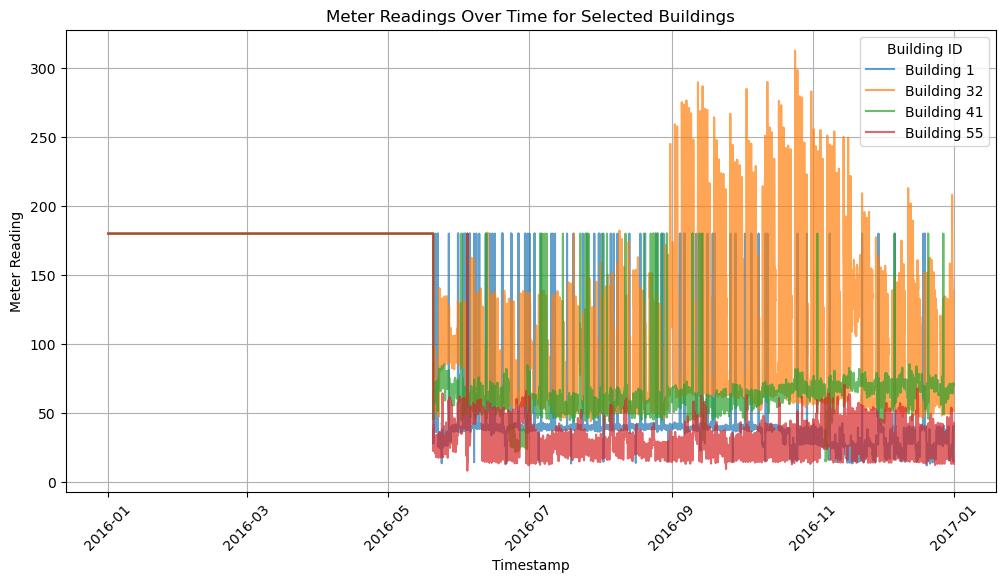

In [11]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Select 4 sample building IDs
sample_buildings = BHE['building_id'].unique()[:4]  # You can adjust this for specific buildings

# Plot meter readings for the selected buildings
for building in sample_buildings:
    plt.plot(BHE[BHE['building_id'] == building]['timestamp'],
             BHE[BHE['building_id'] == building]['meter_reading'],
             label=f'Building {building}', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.title('Meter Readings Over Time for Selected Buildings')
plt.xticks(rotation=45)
plt.legend(title='Building ID')
plt.grid(True)
plt.show()

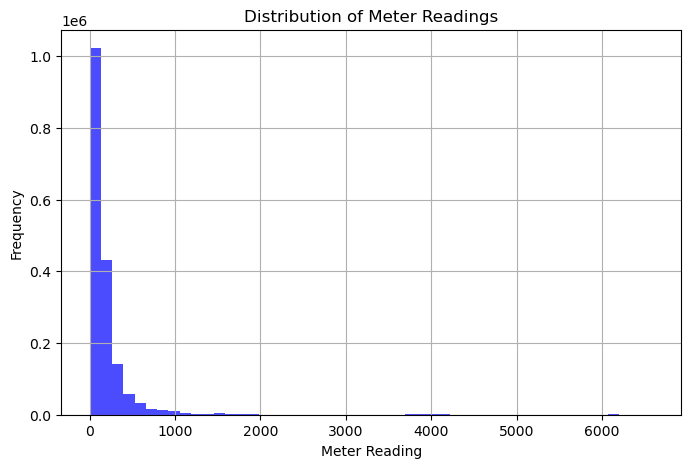

In [12]:
# Histogram to check distribution of meter readings
plt.figure(figsize=(8, 5))
plt.hist(BHE['meter_reading'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.title('Distribution of Meter Readings')
plt.grid(True)
plt.show()

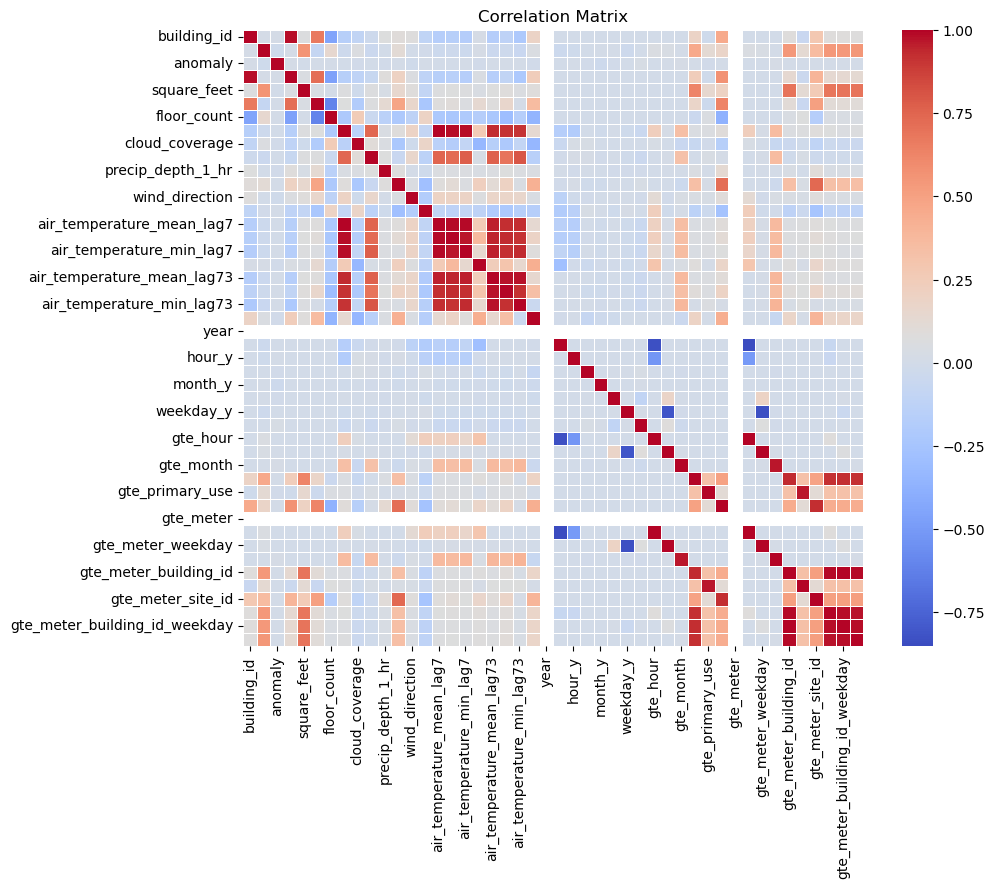

In [13]:
import seaborn as sns
# Select only numeric columns for the correlation matrix
numeric_columns = BHE.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


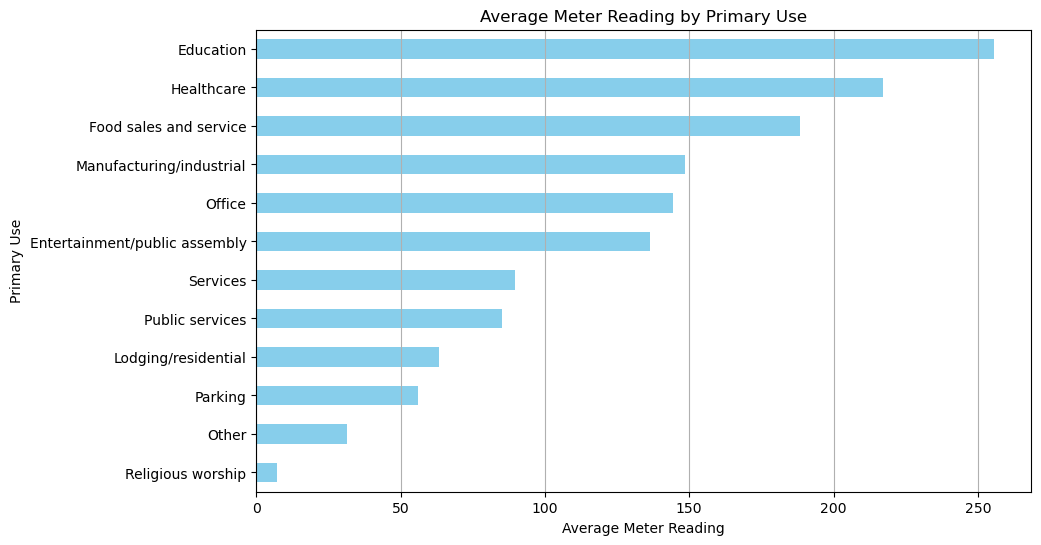

In [14]:
plt.figure(figsize=(10, 6))
BHE.groupby('primary_use')['meter_reading'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Meter Reading by Primary Use')
plt.xlabel('Average Meter Reading')
plt.ylabel('Primary Use')
plt.grid(axis='x')
plt.show()


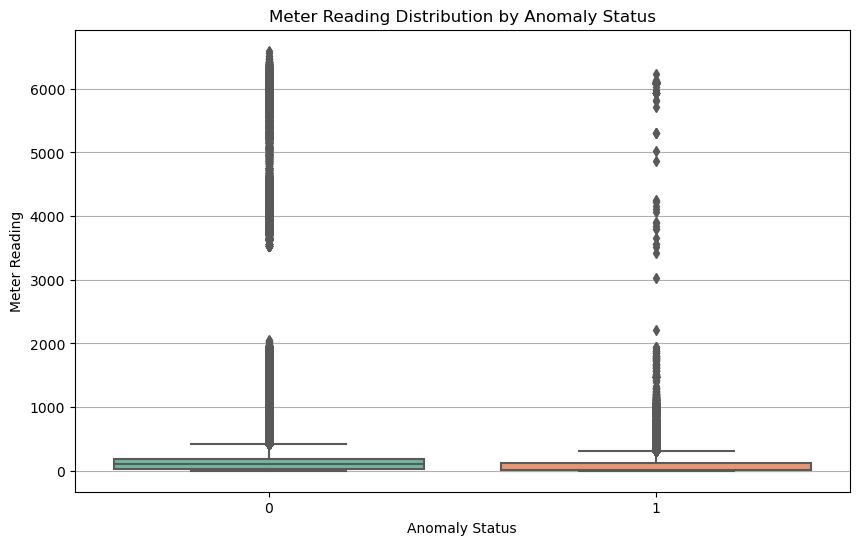

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anomaly', y='meter_reading', data=BHE, palette='Set2')
plt.title('Meter Reading Distribution by Anomaly Status')
plt.xlabel('Anomaly Status')
plt.ylabel('Meter Reading')
plt.grid(axis='y')
plt.show()

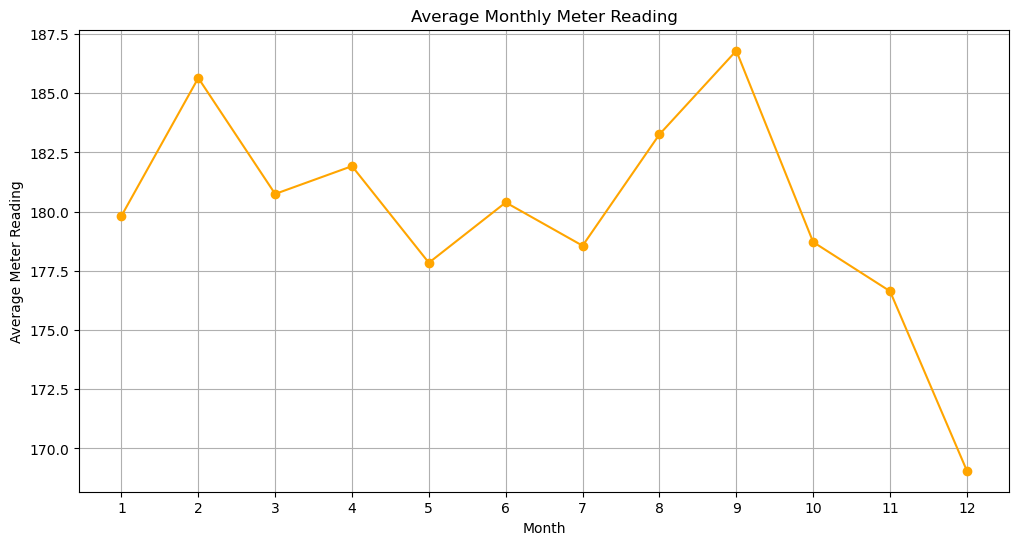

In [16]:
plt.figure(figsize=(12, 6))
BHE.groupby('month')['meter_reading'].mean().plot(marker='o', color='orange')
plt.title('Average Monthly Meter Reading')
plt.xlabel('Month')
plt.ylabel('Average Meter Reading')
plt.xticks(range(1, 13))  # Ensure all months are displayed
plt.grid()
plt.show()


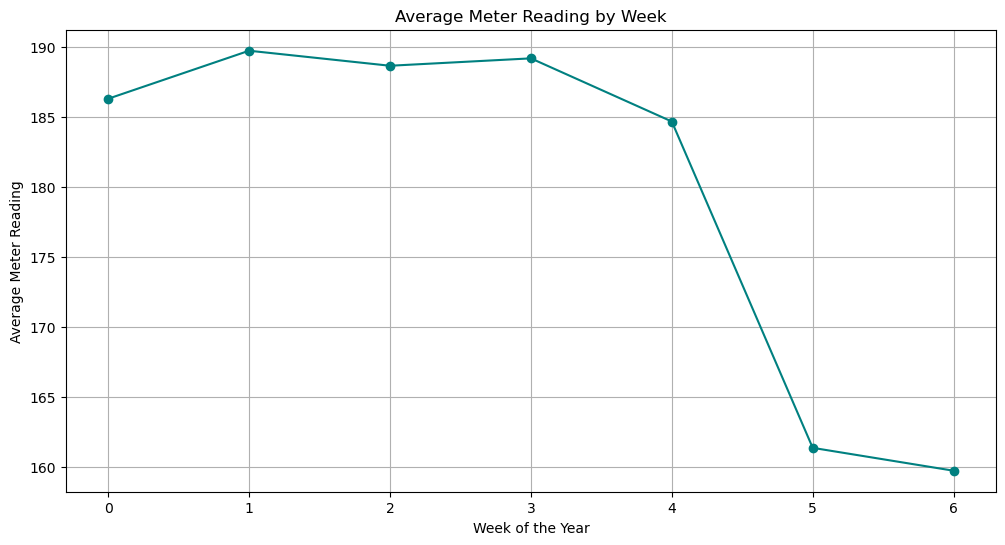

In [17]:
# Calculate the average meter reading for each week
avg_meter_reading_by_week = BHE.groupby('weekday')['meter_reading'].mean()

# Plot the average meter reading by week
plt.figure(figsize=(12, 6))
plt.plot(avg_meter_reading_by_week.index, avg_meter_reading_by_week.values, marker='o', color='teal')
plt.title('Average Meter Reading by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Average Meter Reading')
plt.grid()
plt.show()


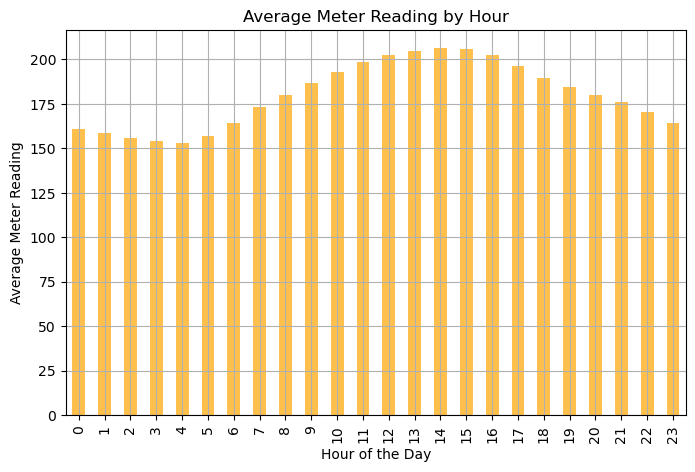

In [18]:
# Average meter readings by hour of the day
plt.figure(figsize=(8, 5))
BHE.groupby('hour')['meter_reading'].mean().plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Meter Reading')
plt.title('Average Meter Reading by Hour')
plt.grid(True)
plt.show()

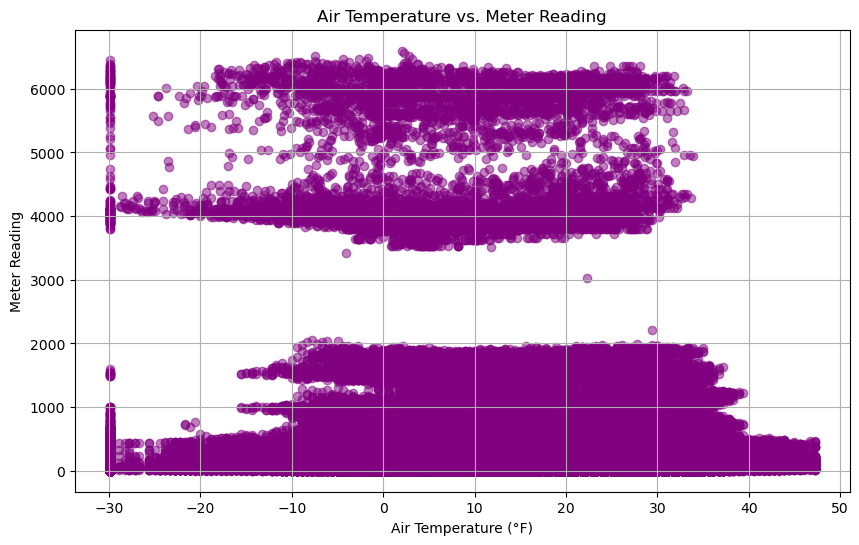

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(BHE['air_temperature'], BHE['meter_reading'], alpha=0.5, color='purple')
plt.title('Air Temperature vs. Meter Reading')
plt.xlabel('Air Temperature (°F)')
plt.ylabel('Meter Reading')
plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


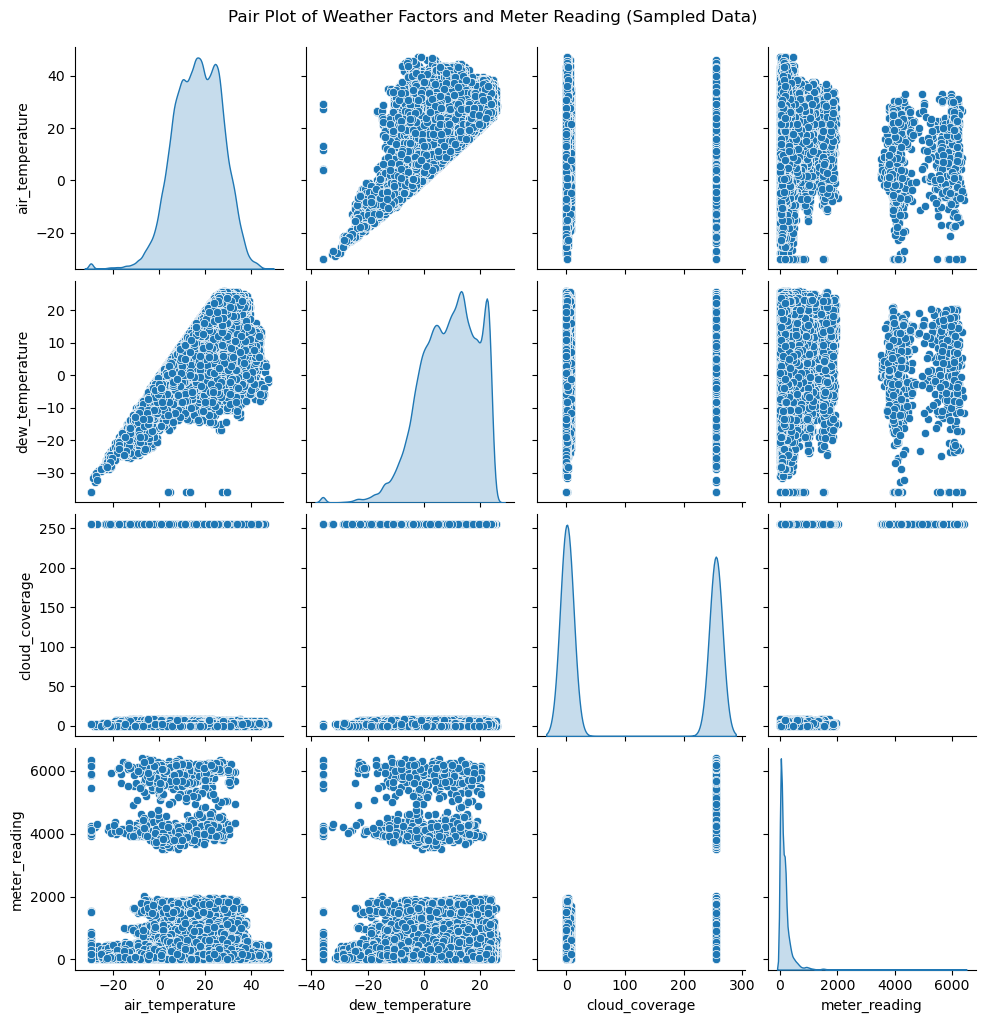

In [20]:
# Sample a fraction of the dataset (e.g., 10% of the data)
BHE_sample = BHE.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Select relevant columns for the pair plot
weather_columns = ['air_temperature', 'dew_temperature', 'cloud_coverage', 'meter_reading']

# Create the pair plot
sns.pairplot(BHE_sample[weather_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Weather Factors and Meter Reading (Sampled Data)', y=1.02)
plt.show()

### Model Building

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt

In [22]:
# Step 1: Preprocessing (Subset and Simplified Scaling)
# Use a smaller subset of the dataset for speed
BHE_sampled = BHE.sample(frac=0.2, random_state=42)

# Drop columns with irrelevant features (e.g., 'gte_*' columns)
columns_to_drop = [col for col in BHE_sampled.columns if col.startswith('gte_')]
BHE_sampled = BHE_sampled.drop(columns=columns_to_drop)

# Encode categorical features
encoder = LabelEncoder()
BHE_sampled['primary_use'] = encoder.fit_transform(BHE_sampled['primary_use'])

In [23]:
# Normalize numerical columns
scaler = StandardScaler()
numerical_cols = ['meter_reading', 'square_feet', 'air_temperature', 'dew_temperature', 'sea_level_pressure', 'wind_speed']
BHE_sampled[numerical_cols] = scaler.fit_transform(BHE_sampled[numerical_cols])

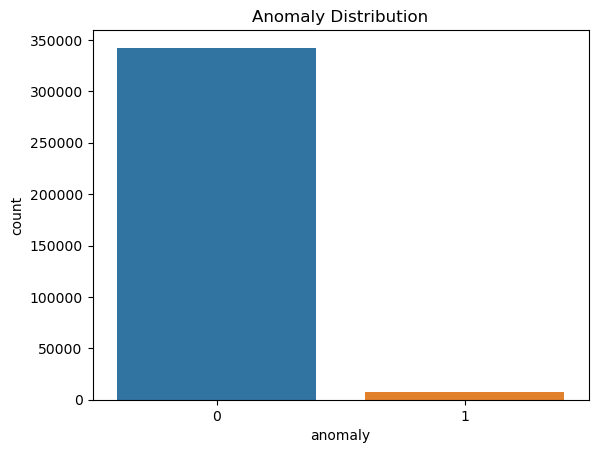

In [24]:
# Visualize the distribution of anomalies (1 for anomaly, 0 for normal)
sns.countplot(x='anomaly', data=BHE_sampled)
plt.title('Anomaly Distribution')
plt.show()

In [25]:
categorical_columns = BHE_sampled.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['weekday_hour', 'building_weekday_hour', 'building_weekday',
       'building_month', 'building_hour', 'building_meter'],
      dtype='object')

In [26]:
# Convert categorical columns to numeric
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    BHE_sampled[column] = le.fit_transform(BHE_sampled[column].astype(str))  # Ensure data is treated as strings
    label_encoders[column] = le

In [27]:
BHE_sampled = BHE_sampled.sort_values(by='month')

In [28]:
# Split into train and test sets
train = BHE_sampled[BHE_sampled['month'] <= 9]
test = BHE_sampled[BHE_sampled['month'] >= 10]
X_train = train.drop(columns=['anomaly', 'timestamp', 'building_id', 'site_id', 'building_meter'])
y_train = train['anomaly']
X_test = test.drop(columns=['anomaly', 'timestamp', 'building_id', 'site_id', 'building_meter'])
y_test = test['anomaly']

In [29]:
# Step 2: Optimized Models with Limited Hyperparameter Tuning
# Isolation Forest
iso_forest = IsolationForest(n_estimators=50, contamination=0.05, random_state=42)
iso_forest.fit(X_train)
y_pred_iso_forest = iso_forest.predict(X_test)
y_pred_iso_forest = np.where(y_pred_iso_forest == -1, 1, 0)

In [30]:
# Local Outlier Factor (Fixed Parameters)
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05, novelty=True)
lof.fit(X_train)
y_pred_lof = lof.predict(X_test)
y_pred_lof_converted = [1 if pred == 1 else 0 for pred in y_pred_lof]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [31]:
# SGD One-Class SVM
sgd_svm = SGDOneClassSVM(nu=0.1, max_iter=500, random_state=42)
sgd_svm.fit(X_train)
y_pred_sgd_one_class_svm = sgd_svm.predict(X_test)
y_pred_sgd_one_class_svm = np.where(y_pred_sgd_one_class_svm == -1, 1, 0)

In [32]:
# Robust Covariance
robust_cov = EllipticEnvelope(contamination=0.05, random_state=42)
robust_cov.fit(X_train)
y_pred_elliptic_env = robust_cov.predict(X_test)
y_pred_elliptic_env = np.where(y_pred_elliptic_env == -1, 1, 0)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the Autoencoder model
autoencoder = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape using the Input layer
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, verbose=0)

# Perform reconstruction and calculate MSE for anomaly detection
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - reconstructions), axis=1)

# Set the threshold for anomaly detection
threshold = np.percentile(mse, 95)
y_pred_autoencoder = np.where(mse > threshold, 1, 0)

2751/2751 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [34]:
# Step 4: Classification Reports
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Isolation Forest": y_pred_iso_forest,
    "Local Outlier Factor": y_pred_lof_converted,
    "SGD One-Class SVM": y_pred_sgd_one_class_svm,
    "Robust Covariance": y_pred_elliptic_env,
    "Autoencoder": y_pred_autoencoder
}

for model_name, y_pred in models.items():
    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Normal", "Anomalous"],  zero_division=0))
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy:.4f}\n")

Confusion Matrix:
[[76279 10007]
 [ 1519   216]]

Isolation Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.88      0.93     86286
   Anomalous       0.02      0.12      0.04      1735

    accuracy                           0.87     88021
   macro avg       0.50      0.50      0.48     88021
weighted avg       0.96      0.87      0.91     88021

Accuracy Score: 0.8691

Confusion Matrix:
[[44022 42264]
 [  777   958]]

Local Outlier Factor Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.51      0.67     86286
   Anomalous       0.02      0.55      0.04      1735

    accuracy                           0.51     88021
   macro avg       0.50      0.53      0.36     88021
weighted avg       0.96      0.51      0.66     88021

Accuracy Score: 0.5110

Confusion Matrix:
[[86286     0]
 [ 1735     0]]

SGD One-Class SVM Classification Report:
              precision